### TASK :- 02 

##### Customer Segmentation

#### libraries (modules or packages)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import and understand the dataset.

In [13]:
df = pd.read_excel(r"C:\Users\Personal\Downloads\Sample SuperStore - Europe (1).xls")
df.head(5)

,Row ID,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,Country/Region,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60
1,2,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00
2,3,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11
3,4,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20
4,5,ES-2023-1311038,2023-02-07,2023-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71


#### Sanity Check

In [16]:
# shape of dataset
df.shape

(10000, 20)

In [17]:
# number of dimensions
df.ndim

2

In [6]:
# data information and Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10000 non-null  int64         
 1   Order ID        10000 non-null  object        
 2   Order Date      10000 non-null  datetime64[ns]
 3   Dispatch Date   10000 non-null  datetime64[ns]
 4   Delivery Mode   10000 non-null  object        
 5   Customer ID     10000 non-null  object        
 6   Customer Name   10000 non-null  object        
 7   Segment         10000 non-null  object        
 8   City            10000 non-null  object        
 9   State/Province  10000 non-null  object        
 10  Country/Region  10000 non-null  object        
 11  Region          10000 non-null  object        
 12  Product ID      10000 non-null  object        
 13  Category        10000 non-null  object        
 14  Sub-Category    10000 non-null  object        
 15  Pro

In [7]:
# Check Duplicates
df.duplicated().sum()

0

In [9]:
# Missing Values

df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Dispatch Date     0
Delivery Mode     0
Customer ID       0
Customer Name     0
Segment           0
City              0
State/Province    0
Country/Region    0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [8]:
df.describe()

,Row ID,Order Date,Dispatch Date,Sales,Quantity,Discount,Profit
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2022-05-14 19:07:40.799999744,2022-05-16 12:04:36.479999744,293.808906,3.777300,0.103105,37.282974
min,1.00000,2020-01-01 00:00:00,2020-01-05 00:00:00,2.955000,1.000000,0.000000,-3059.820000
25%,2500.75000,2021-06-30 00:00:00,2021-07-05 00:00:00,49.462500,2.000000,0.000000,1.320000
50%,5000.50000,2022-07-09 00:00:00,2022-07-11 00:00:00,119.355000,3.000000,0.000000,14.220000
75%,7500.25000,2023-06-03 00:00:00,2023-05-28 00:00:00,320.708625,5.000000,0.100000,48.510000
max,10000.00000,2023-12-31 00:00:00,2023-12-31 00:00:00,7958.580000,14.000000,0.850000,3979.080000
std,2886.89568,NaN,NaN,486.055635,2.203268,0.174782,178.100384


##### Unique values of dataset

In [18]:
df.nunique()

Row ID            10000
Order ID           4596
Order Date         1253
Dispatch Date      1360
Delivery Mode         4
Customer ID         795
Customer Name       795
Segment               3
City               1055
State/Province      127
Country/Region       15
Region                3
Product ID         1915
Category              3
Sub-Category         17
Product Name       1856
Sales              6604
Quantity             14
Discount             14
Profit             5673
dtype: int64

In [19]:
df['Delivery Mode'].value_counts()

Delivery Mode
Standard Class    6054
Second Class      1976
First Class       1454
Same Day           516
Name: count, dtype: int64

<Axes: xlabel='Delivery Mode'>

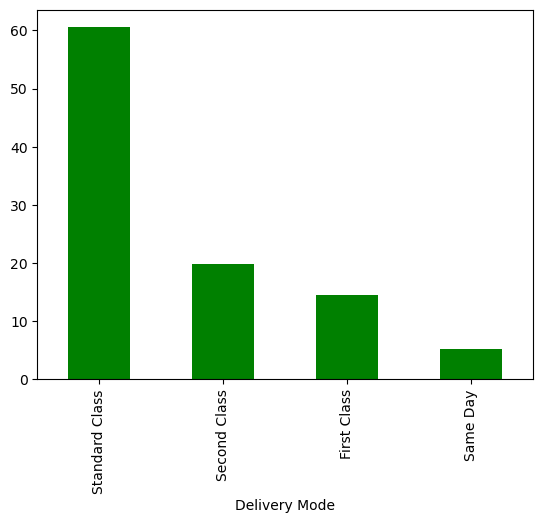

In [20]:
((df['Delivery Mode'].value_counts()/len(df['Delivery Mode']))*100).plot(kind = 'bar', color = 'green')

In [21]:
region_profit = df.groupby('Region')['Profit'].sum().reset_index()
region_profit

,Region,Profit
0,Central,215534.0685
1,North,91779.8550
2,South,65515.8180


##### Region wise Profit (Plot)

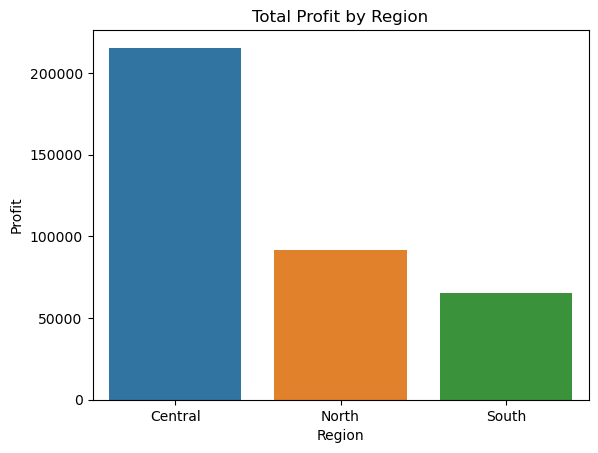

In [37]:
sns.barplot( data=region_profit, x='Region', y='Profit')
plt.title('Total Profit by Region')
plt.show()

##### Sales VS Profit

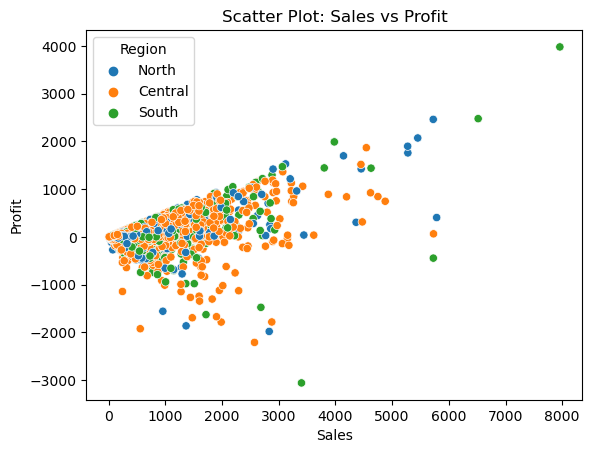

In [33]:
sns.scatterplot(data = df, x='Sales', y='Profit', hue='Region')
plt.title('Scatter Plot: Sales vs Profit')
plt.show()

##### Sales and Profit based on Region

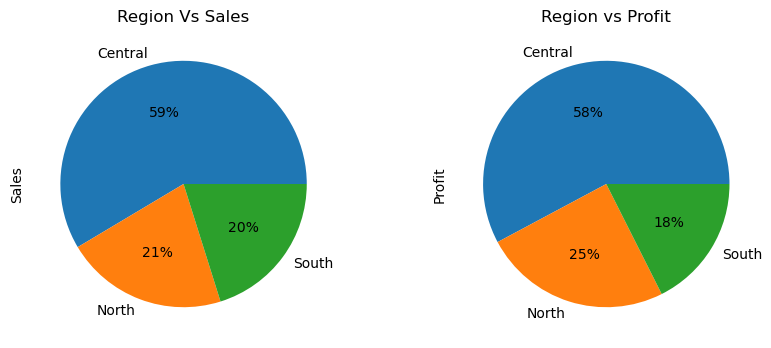

In [24]:
plt.figure(figsize= (10,4))
plt.subplot(1, 2, 1)
df.groupby("Region")["Sales"].sum().plot.pie(autopct = "%1.0f%%")
plt.title("Region Vs Sales")
plt.subplot(1, 2, 2)
df.groupby("Region")["Profit"].sum().plot.pie(autopct = "%1.0f%%")
plt.title("Region vs Profit")
plt.show()

##### Sales and Profit based on Segemnt

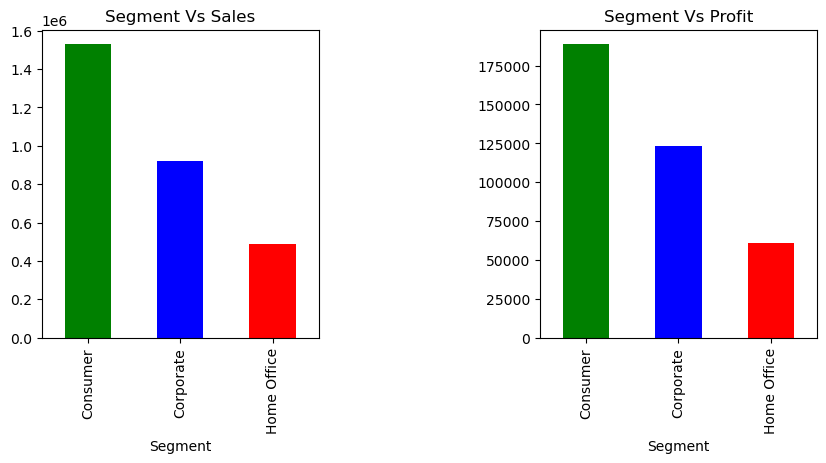

In [28]:
fig = plt.figure(figsize=(10, 4))

# First subplot (Segment Vs Sales)
plt.subplot(1, 2, 1)
df.groupby("Segment").Sales.sum().plot.bar(color=['green', 'blue', 'red'])
plt.title("Segment Vs Sales")

# Add some space between subplots
plt.subplots_adjust(wspace=0.8)

# Second subplot (Segment Vs Profit)
plt.subplot(1, 2, 2)
df.groupby("Segment").Profit.sum().plot.bar(color=['green', 'blue', 'red'])
plt.title("Segment Vs Profit")

plt.show()

##### Sales and Profit based on Category

In [29]:
df.groupby("Category").Sales.sum()

Category
Furniture          7.791030e+05
Office Supplies    1.046307e+06
Technology         1.112679e+06
Name: Sales, dtype: float64

In [30]:
df.groupby("Category").Profit.sum()

Category
Furniture           68850.1395
Office Supplies    159706.9440
Technology         144272.6580
Name: Profit, dtype: float64

#### Comparision between Discount and Total Sales Based on Category.

In [31]:
df5 = df.groupby(["Discount","Category"])["Sales"].sum().reset_index()
df5

,Discount,Category,Sales
0,0.00,Furniture,293134.5600
1,0.00,Office Supplies,590459.1300
2,0.00,Technology,638862.1200
3,0.10,Furniture,312155.7480
4,0.10,Office Supplies,340179.8040
5,0.10,Technology,110076.4890
6,0.15,Technology,256321.3335
7,0.20,Furniture,29812.7760
8,0.20,Office Supplies,12799.7040
9,0.30,Furniture,6137.2290


#### Exploration of Sales, Quantity, and Profit.

In [32]:
df['abs_profit'] = df['Profit'].abs()
df['abs_profit']

0        39.60
1         0.00
2        16.11
3        13.20
4        73.71
         ...  
9995     23.88
9996      0.57
9997     28.98
9998    221.13
9999     50.22
Name: abs_profit, Length: 10000, dtype: float64